In [908]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../Data/School/0001/student_employed.csv')

In [909]:
df['channel_aggregated']=df.employment_channel

In [910]:
df.columns

Index(['school_id', 'gender', 'course_1', 'course_2', 'course_3', 'course_4',
       'course_5', 'course_6', 'heir', 'relation_to_the_guardian',
       'occupation_of_the_guardian', ' living_standard', 'family_size',
       'industry', 'location', 'firm_size', 'job_description',
       'trainee_or_apprentice', 'salary', 'commute_or_live_alone',
       'employment_channel', 'attend_school', 'channel_aggregated'],
      dtype='object')

In [911]:
df=df[(df.salary !=99999)]

In [912]:
df

,school_id,gender,course_1,course_2,course_3,course_4,course_5,course_6,heir,relation_to_the_guardian,...,industry,location,firm_size,job_description,trainee_or_apprentice,salary,commute_or_live_alone,employment_channel,attend_school,channel_aggregated
0,101,1,2,,,,,,1,3,...,33,1,1000,2014,1,5650,2,4,,4
1,101,1,2,,,,,,1,2,...,36,10,1000,2013,1,5300,2,1,,1
2,101,1,5,,,,,,1,1,...,36,1,1000,2021,1,6700,2,1,,1
3,101,1,1,,,,,,2,2,...,36,1,1000,2011,1,6000,2,1,,1
4,101,1,5,,,,,,2,3,...,36,1,1000,2011,1,5800,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13098,1312,2,5,4,,,,,2,3,...,22,93,200,1074,9,3500,1,3,,3
13099,1312,2,5,4,,,,,2,2,...,22,93,200,1073,9,3500,1,3,,3
13100,1312,2,5,4,,,,,2,1,...,22,93,200,1073,9,3500,1,3,,3
13101,1312,2,5,4,,,,,2,2,...,22,150,120,1071,9,1000,1,9,,9


In [913]:
df=df[(df.salary !=99999)&(df.firm_size!=9999)]

In [914]:
df

,school_id,gender,course_1,course_2,course_3,course_4,course_5,course_6,heir,relation_to_the_guardian,...,industry,location,firm_size,job_description,trainee_or_apprentice,salary,commute_or_live_alone,employment_channel,attend_school,channel_aggregated
0,101,1,2,,,,,,1,3,...,33,1,1000,2014,1,5650,2,4,,4
1,101,1,2,,,,,,1,2,...,36,10,1000,2013,1,5300,2,1,,1
2,101,1,5,,,,,,1,1,...,36,1,1000,2021,1,6700,2,1,,1
3,101,1,1,,,,,,2,2,...,36,1,1000,2011,1,6000,2,1,,1
4,101,1,5,,,,,,2,3,...,36,1,1000,2011,1,5800,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13098,1312,2,5,4,,,,,2,3,...,22,93,200,1074,9,3500,1,3,,3
13099,1312,2,5,4,,,,,2,2,...,22,93,200,1073,9,3500,1,3,,3
13100,1312,2,5,4,,,,,2,1,...,22,93,200,1073,9,3500,1,3,,3
13101,1312,2,5,4,,,,,2,2,...,22,150,120,1071,9,1000,1,9,,9


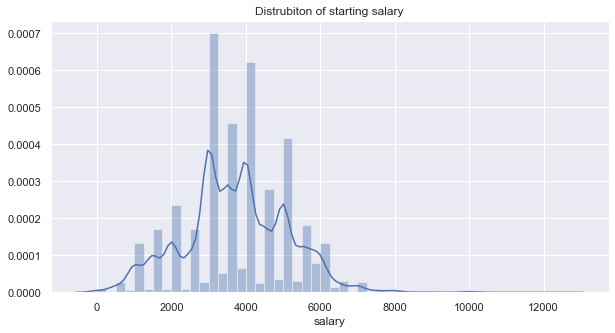

In [915]:
sns.set()
sns_salary_uncond=sns.distplot(df.salary)
sns_salary_fig=sns_salary_uncond.get_figure()
plt.title('Distrubiton of starting salary')
sns_salary_fig.savefig('salary_unconditional_dist.png')

In [916]:
dict = {1:'school_and_pes',2:'school',3:'pes',4:'friends',5:'family',
        6:'other_connections',7:'ad',8:'high_school',9:'firm',99:'no_response'}

In [917]:
dict_agg = {1:'school',2:'school',3:'school',
            4:'connections',5:'connections', 6:'connections',
            7:'ad',8:'high_school',9:'firm',99:'no_response'}

In [918]:
df.channel_aggregated=df.channel_aggregated.map(dict_agg)

In [923]:
df

,school_id,gender,course_1,course_2,course_3,course_4,course_5,course_6,heir,relation_to_the_guardian,...,industry,location,firm_size,job_description,trainee_or_apprentice,salary,commute_or_live_alone,employment_channel,attend_school,channel_aggregated
0,101,1,2,,,,,,1,3,...,33,1,1000,2014,1,5650,2,4,,connections
1,101,1,2,,,,,,1,2,...,36,10,1000,2013,1,5300,2,1,,school
2,101,1,5,,,,,,1,1,...,36,1,1000,2021,1,6700,2,1,,school
3,101,1,1,,,,,,2,2,...,36,1,1000,2011,1,6000,2,1,,school
4,101,1,5,,,,,,2,3,...,36,1,1000,2011,1,5800,2,1,1,school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13098,1312,2,5,4,,,,,2,3,...,22,93,200,1074,9,3500,1,3,,school
13099,1312,2,5,4,,,,,2,2,...,22,93,200,1073,9,3500,1,3,,school
13100,1312,2,5,4,,,,,2,1,...,22,93,200,1073,9,3500,1,3,,school
13101,1312,2,5,4,,,,,2,2,...,22,150,120,1071,9,1000,1,9,,firm


In [921]:
df.channel_aggregated

0        connections
1             school
2             school
3             school
4             school
            ...     
13098         school
13099         school
13100         school
13101           firm
13102    connections
Name: channel_aggregated, Length: 9385, dtype: object

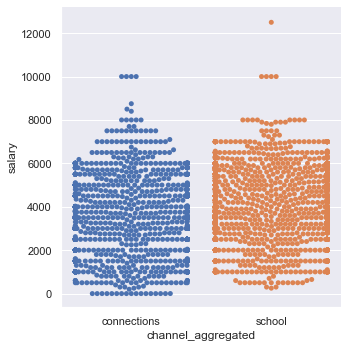

In [928]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]
sns.catplot(x='channel_aggregated',y='salary',kind='swarm',data=df[(df.channel_aggregated=='school')|(df.channel_aggregated=='connections')])

In [829]:
df_average=df.groupby(['school_id','channel_aggregated']).mean()

In [830]:
df_avg_salary=df_average.starting_salary.unstack(level=-1).reset_index()

In [831]:
df_avg_firm_size=df_average.firm_size.unstack(level=-1).reset_index()

In [875]:
df_avg_salary.replace(np.nan,0)

channel_aggregated,school_id,ad,connections,firm,high_school,no_response,school
0,101,0.0,4754.951613,0.0,0.0,0.0,5130.894737
1,102,0.0,4540.000000,0.0,0.0,0.0,5027.102804
2,103,0.0,4395.916667,0.0,0.0,0.0,5498.571429
3,104,0.0,5194.444444,0.0,0.0,4500.0,5070.093458
4,105,0.0,4000.000000,0.0,0.0,0.0,3772.727273
...,...,...,...,...,...,...,...
176,1308,2500.0,2216.666667,1500.0,0.0,2500.0,3060.000000
177,1309,0.0,2633.333333,0.0,0.0,0.0,2768.750000
178,1310,3250.0,3071.428571,0.0,0.0,3000.0,0.000000
179,1311,0.0,1833.333333,0.0,0.0,0.0,2450.000000


In [833]:
salary_gap = df_avg_salary.school - df_avg_salary.connections

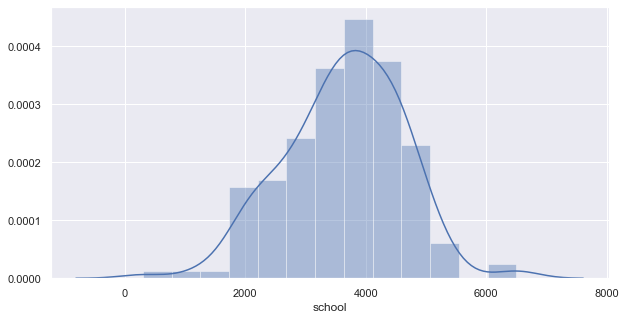

In [834]:
sns.set()
sns.distplot(df_avg_salary.school.dropna())

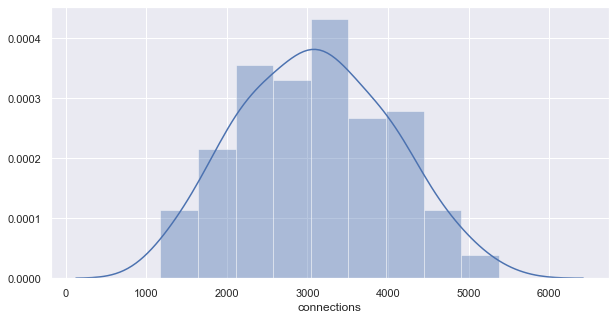

In [835]:
sns.distplot(df_avg_salary.connections.dropna())

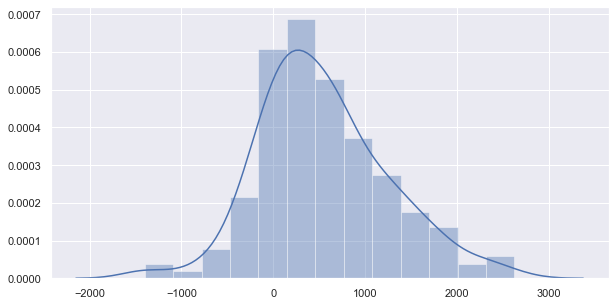

In [836]:
sns.set()
sns.distplot(salary_gap.dropna())

In [931]:
descr=salary_gap.describe()

In [933]:
descr.to_csv('test.csv')

/Users/satoshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [837]:
df_avg_firm_size

channel_aggregated,school_id,ad,connections,firm,high_school,no_response,school
0,101,NaN,396.258065,NaN,NaN,NaN,420.771930
1,102,NaN,749.333333,NaN,NaN,NaN,451.887850
2,103,NaN,364.333333,NaN,NaN,NaN,664.757143
3,104,NaN,673.888889,NaN,NaN,12.5,682.897196
4,105,NaN,1000.000000,NaN,NaN,NaN,352.590909
...,...,...,...,...,...,...,...
176,1308,5.0,4.166667,3.0,NaN,17.0,14.800000
177,1309,NaN,38.555556,NaN,NaN,NaN,107.062500
178,1310,5.5,440.142857,NaN,NaN,3.0,NaN
179,1311,NaN,7.333333,NaN,NaN,NaN,261.000000


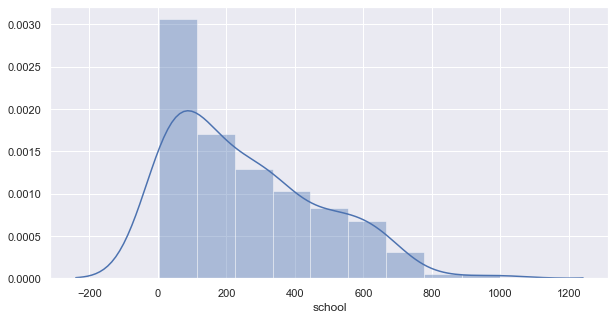

In [838]:
sns.distplot(df_avg_firm_size.school.dropna())

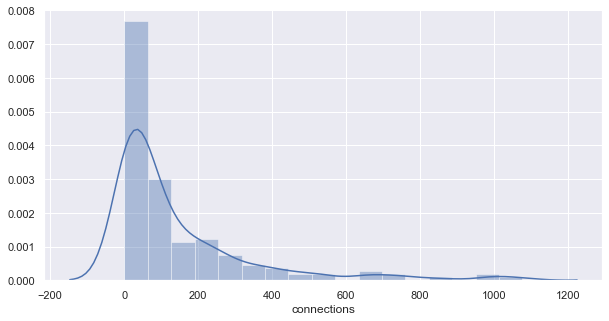

In [839]:
sns.distplot(df_avg_firm_size.connections.dropna())

In [840]:
firm_size_gap=df_avg_firm_size.school-df_avg_firm_size.connections

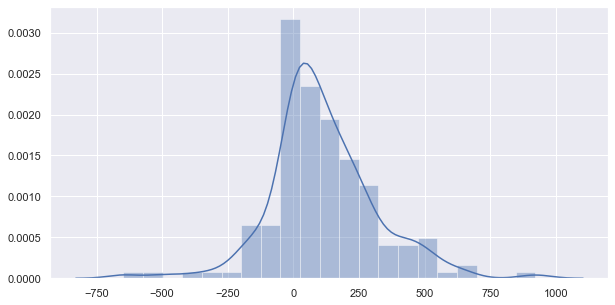

In [841]:
sns.distplot(firm_size_gap.dropna())

In [842]:
df_average.unstack(level=-1)

gender                                                     \
channel_aggregated     ad connections firm high_school no_response    school   
school_id                                                                      
101                   NaN    1.548387  NaN         NaN         NaN  1.333333   
102                   NaN    2.000000  NaN         NaN         NaN  1.439252   
103                   NaN    1.541667  NaN         NaN         NaN  1.371429   
104                   NaN    1.277778  NaN         NaN    2.000000  1.336449   
105                   NaN    2.000000  NaN         NaN         NaN  1.409091   
...                   ...         ...  ...         ...         ...       ...   
1308                  2.0    1.833333  1.0         NaN    1.666667  1.200000   
1309                  NaN    1.333333  NaN         NaN         NaN  1.750000   
1310                  1.5    1.428571  NaN         NaN    2.000000       NaN   
1311                  NaN    1.166667  NaN         NaN         NaN  1.900000   
1312                  NaN    1.400000  2.0         NaN         NaN  1.857143   

                   course_1                               ...  \
channel_aggregated       ad connections firm high_school  ...   
school_id                                                 ...   
101                     NaN    3.645161  NaN         NaN  ...   
102                     NaN    4.533333  NaN         NaN  ...   
103                     NaN    3.791667  NaN         NaN  ...   
104                     NaN    3.555556  NaN         NaN  ...   
105                     NaN    5.000000  NaN         NaN  ...   
...                     ...         ...  ...         ...  ...   
1308                    4.0    3.833333  1.0         NaN  ...   
1309                    NaN    4.111111  NaN         NaN  ...   
1310                    5.0    4.285714  NaN         NaN  ...   
1311                    NaN    3.333333  NaN         NaN  ...   
1312                    NaN    5.000000  5.0         NaN  ...   

                   commute_or_live_alone                                    \
channel_aggregated                  firm high_school no_response    school   
school_id                                                                    
101                                  NaN         NaN         NaN  1.982456   
102                                  NaN         NaN         NaN  2.000000   
103                                  NaN         NaN         NaN  2.000000   
104                                  NaN         NaN    2.000000  1.943925   
105                                  NaN         NaN         NaN  1.981818   
...                                  ...         ...         ...       ...   
1308                                 1.0         NaN    1.666667  1.800000   
1309                                 NaN         NaN         NaN  1.750000   
1310                                 NaN         NaN    1.000000       NaN   
1311                                 NaN         NaN         NaN  1.000000   
1312                                 1.0         NaN         NaN  1.000000   

                   employment_channel                               \
channel_aggregated                 ad connections firm high_school   
school_id                                                            
101                               NaN    4.403226  NaN         NaN   
102                               NaN    5.000000  NaN         NaN   
103                               NaN    6.000000  NaN         NaN   
104                               NaN    6.000000  NaN         NaN   
105                               NaN    6.000000  NaN         NaN   
...                               ...         ...  ...         ...   
1308                              7.0    5.166667  9.0         NaN   
1309                              NaN    5.222222  NaN         NaN   
1310                              7.0    5.142857  NaN         NaN   
1311                              NaN    4.333333  NaN

In [843]:
df_average

gender  course_1      heir  \
school_id channel_aggregated                                 
101       connections         1.548387  3.645161  1.741935   
          school              1.333333  3.201754  1.719298   
102       connections         2.000000  4.533333  2.000000   
          school              1.439252  4.102804  1.728972   
103       connections         1.541667  3.791667  9.000000   
...                                ...       ...       ...   
1311      connections         1.166667  3.333333  2.000000   
          school              1.900000  4.800000  1.800000   
1312      connections         1.400000  5.000000  1.800000   
          firm                2.000000  5.000000  2.000000   
          school              1.857143  5.000000  2.000000   

                              relation_to_the_guardian  \
school_id channel_aggregated                             
101       connections                         2.016129   
          school                              2.061404   
102       connections                         1.600000   
          school                              2.028037   
103       connections                         2.000000   
...                                                ...   
1311      connections                         2.500000   
          school                              3.700000   
1312      connections                         2.100000   
          firm                                2.000000   
          school                              2.142857   

                              occupation_of_the_guardian   living_standard  \
school_id channel_aggregated                                                 
101       connections                           6.838710          2.161290   
          school                                6.850877          2.026316   
102       connections                           7.066667          2.400000   
          school                                7.093458          2.327103   
103       connections                           8.500000          2.500000   
...                                                  ...               ...   
1311      connections                           2.666667          3.666667   
          school                                2.600000          5.500000   
1312      connections                           5.200000          3.400000   
          firm                                  1.000000          3.000000   
          school                                1.571429          2.428571   

                              family_size   industry    location   firm_size  \
school_id channel_aggregated                                                   
101       connections            7.112903  26.274194   79.580645  396.258065   
          school                 5.877193  30.728070   37.754386  420.771930   
102       connections            5.000000  22.333333  134.666667  749.333333   
          school                 5.448598  30.401869   14.925234  451.887850   
103       connections            4.791667  23.625000   26.625000  364.333333   
...                                   ...        ...         ...         ...   
1311      connections           20.666667  16.500000  136.666667    7.333333   
          school                52.900000  20.500000  106.600000  261.000000   
1312      connections            5.000000  19.400000  147.000000   28.400000   
          firm                   7.000000  22.000000  150.000000  120.000000   
          school                 6.857143  19.857143  107.857143  286.000000   

                              trainee_or_apprentice  starting_salary  \
school_id channel_aggregated                                           
101       connections                      8.870968      4754.951613   
          school                           7.008772      5130.894737   
102       connections                      9.000000      4540.000000   
          school                           4.672897   

In [844]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]

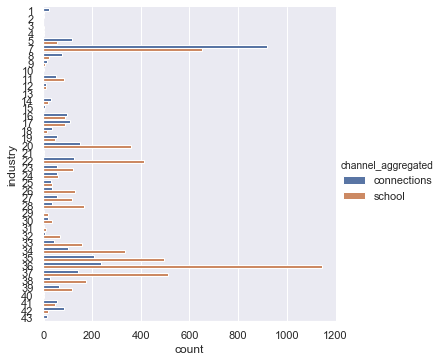

In [930]:

sns_ind_count=sns.catplot(y='industry',kind='count',hue='channel_aggregated',data=df[(df.channel_aggregated=='school')|(df.channel_aggregated=='connections')])
sns_ind_fig=sns_ind_count.fig
sns_ind_count.savefig('industry.png')

In [846]:
dict_gender = {1:'Male',2:'Female'}

In [847]:
df['gender_mapped']=df.gender.map(dict_gender)

In [848]:
df.gender.map(dict_gender)

0          Male
1          Male
2          Male
3          Male
4          Male
          ...  
13098    Female
13099    Female
13100    Female
13101    Female
13102    Female
Name: gender, Length: 9385, dtype: object

In [849]:
df['gender_count']=1

In [850]:
df[(df.school_id==101)&(df.gender_mapped=='Female')]

,school_id,gender,course_1,course_2,course_3,course_4,course_5,course_6,heir,relation_to_the_guardian,...,firm_size,job_description,trainee_or_apprentice,starting_salary,commute_or_live_alone,employment_channel,attend_school,channel_aggregated,gender_mapped,gender_count
109,101,2,1,,,,,,2,2,...,30,B,9,3500,2,5,,connections,Female,1
110,101,2,5,,,,,,2,2,...,10,B,9,4532,2,1,1,school,Female,1
111,101,2,4,,,,,,1,2,...,1000,E,9,5659,2,4,,connections,Female,1
112,101,2,4,,,,,,2,1,...,150,V,9,7100,2,1,,school,Female,1
113,101,2,1,,,,,,2,2,...,63,E,9,6500,2,1,,school,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,101,2,9,,,,,,2,2,...,30,6111,9,3500,2,1,,school,Female,1
178,101,2,9,,,,,,2,2,...,30,6111,9,3500,2,1,,school,Female,1
179,101,2,9,,,,,,2,1,...,5,6111,9,2000,1,1,,school,Female,1
180,101,2,9,,,,,,2,1,...,5,6111,9,2000,1,1,,school,Female,1


In [851]:
df_sum=pd.get_dummies(df, columns=['channel_aggregated']).groupby(['school_id','gender_mapped']).sum()

In [852]:
df_sum

gender  course_1  heir  relation_to_the_guardian  \
school_id gender_mapped                                                     
101       Female            144       346   139                       136   
          Male              104       245   165                       224   
102       Female            124       287   124                       121   
          Male               60       220    91                       120   
103       Female             78       194   351                        74   
...                         ...       ...   ...                       ...   
1310      Male                5        23     9                        11   
1311      Female             20        56    19                        39   
          Male                6        12    11                        13   
1312      Female             22        55    22                        21   
          Male                7        35    12                        17   

                         occupation_of_the_guardian   living_standard  \
school_id gender_mapped                                                 
101       Female                                446               144   
          Male                                  759               221   
102       Female                                469               149   
          Male                                  396               136   
103       Female                                336                89   
...                                             ...               ...   
1310      Male                                    9                 9   
1311      Female                                 26                62   
          Male                                   16                15   
1312      Female                                 25                28   
          Male                                   39                26   

                         family_size  industry  location  firm_size  ...  \
school_id gender_mapped                                              ...   
101       Female                 425      1925      3192      42914  ...   
          Male                   686      3207      6046      29622  ...   
102       Female                 328      1616      3408      38974  ...   
          Male                   330      1972       209      20618  ...   
103       Female                 198      1122       353      27897  ...   
...                              ...       ...       ...        ...  ...   
1310      Male                    36       183       660       3047  ...   
1311      Female                 624       240      1076       2600  ...   
          Male                    29        64       810         54  ...   
1312      Female                  65       223      1335       2260  ...   
          Male                    40       132      1040        146  ...   

                         starting_salary  commute_or_live_alone  \
school_id gender_mapped                                           
101       Female                  348133                    142   
          Male                    531596                    201   
102       Female                  299900                    124   
          Male                    306100                    120   
103       Female                  188802                     84   
...                                  ...                    ...   
1310      Male                     17000                     10   
1311      Female                   24000                     10   
          Male                     11500                      7   
1312      Female                   26400                     12   
          Male                     10000                      8   

                         employment_channel  gender_count  \
school_id gender_mapped                                     
101       Female                        192            72   
          Male               

In [853]:
df_sum_channel=df_sum.iloc[:,-6:].unstack(level=-1).reset_index()

In [854]:
df_sum_total=df_sum.iloc[:,-7].unstack(level=-1).reset_index()

In [855]:
df_sum_total

gender_mapped,school_id,Female,Male
0,101,72.0,104.0
1,102,62.0,60.0
2,103,39.0,55.0
3,104,43.0,84.0
4,105,92.0,130.0
...,...,...,...
176,1308,9.0,7.0
177,1309,15.0,10.0
178,1310,5.0,5.0
179,1311,10.0,6.0


In [856]:
df_sum_total.columns

Index(['school_id', 'Female', 'Male'], dtype='object', name='gender_mapped')

In [857]:
ind_total = {'school_id','Female_total','Male_total'}

In [858]:
df_sum_total.columns=['school_id','Female_total','Male_total']

In [859]:
df_sum_channel

school_id channel_aggregated_ad       \
gender_mapped                          Female Male   
0                   101                   0.0  0.0   
1                   102                   0.0  0.0   
2                   103                   0.0  0.0   
3                   104                   0.0  0.0   
4                   105                   0.0  0.0   
..                  ...                   ...  ...   
176                1308                   1.0  0.0   
177                1309                   0.0  0.0   
178                1310                   1.0  1.0   
179                1311                   0.0  0.0   
180                1312                   0.0  0.0   

              channel_aggregated_connections       channel_aggregated_firm  \
gender_mapped                         Female  Male                  Female   
0                                       34.0  28.0                     0.0   
1                                       15.0   0.0                     0.0   
2                                       13.0  11.0                     0.0   
3                                        5.0  13.0                     0.0   
4                                        2.0   0.0                     0.0   
..                                       ...   ...                     ...   
176                                      5.0   1.0                     0.0   
177                                      3.0   6.0                     0.0   
178                                      3.0   4.0                     0.0   
179                                      1.0   5.0                     0.0   
180                                      4.0   6.0                     1.0   

                   channel_aggregated_high_school       \
gender_mapped Male                         Female Male   
0              0.0                            0.0  0.0   
1              0.0                            0.0  0.0   
2              0.0                            0.0  0.0   
3              0.0                            0.0  0.0   
4              0.0                            0.0  0.0   
..             ...                            ...  ...   
176            1.0                            0.0  0.0   
177            0.0                            0.0  0.0   
178            0.0                            0.0  0.0   
179            0.0                            0.0  0.0   
180            0.0                            0.0  0.0   

              channel_aggregated_no_response      channel_aggregated_school  \
gender_mapped                         Female Male                    Female   
0                                        0.0  0.0                      38.0   
1                                        0.0  0.0                      47.0   
2                                        0.0  0.0                      26.0   
3                                        2.0  0.0                      36.0   
4                                        0.0  0.0                      90.0   
..                                       ...  ...                       ...   
176                                      2.0  1.0                       1.0   
177                                      0.0  0.0                      12.0   
178                                      1.0  0.0                       0.0   
179                                      0.0  0.0                       9.0   
180                                      0.0  0.0                       6.0   

                      
gender_mapped   Male  
0               76.0  
1               60.0  
2               44.0  
3               71.0  
4              130.0  
..               ...  
176              4.0  
177              4.0  
178              0.0  
179              1.0  
180              1.0  

[181 rows x 13 columns]

In [860]:
mi=df_sum_channel.columns

In [861]:
mi.tolist()[1:]

[('channel_aggregated_ad', 'Female'),
 ('channel_aggregated_ad', 'Male'),
 ('channel_aggregated_connections', 'Female'),
 ('channel_aggregated_connections', 'Male'),
 ('channel_aggregated_firm', 'Female'),
 ('channel_aggregated_firm', 'Male'),
 ('channel_aggregated_high_school', 'Female'),
 ('channel_aggregated_high_school', 'Male'),
 ('channel_aggregated_no_response', 'Female'),
 ('channel_aggregated_no_response', 'Male'),
 ('channel_aggregated_school', 'Female'),
 ('channel_aggregated_school', 'Male')]

In [862]:
ind_channel = pd.Index([e[1] + '_' +e[0] for e in mi.tolist()[1:]])

In [863]:
ind_channel

Index(['Female_channel_aggregated_ad', 'Male_channel_aggregated_ad',
       'Female_channel_aggregated_connections',
       'Male_channel_aggregated_connections', 'Female_channel_aggregated_firm',
       'Male_channel_aggregated_firm', 'Female_channel_aggregated_high_school',
       'Male_channel_aggregated_high_school',
       'Female_channel_aggregated_no_response',
       'Male_channel_aggregated_no_response',
       'Female_channel_aggregated_school', 'Male_channel_aggregated_school'],
      dtype='object')

In [864]:
ind_channel = ind_channel.insert(0,'school_id')

In [865]:
ind_channel

Index(['school_id', 'Female_channel_aggregated_ad',
       'Male_channel_aggregated_ad', 'Female_channel_aggregated_connections',
       'Male_channel_aggregated_connections', 'Female_channel_aggregated_firm',
       'Male_channel_aggregated_firm', 'Female_channel_aggregated_high_school',
       'Male_channel_aggregated_high_school',
       'Female_channel_aggregated_no_response',
       'Male_channel_aggregated_no_response',
       'Female_channel_aggregated_school', 'Male_channel_aggregated_school'],
      dtype='object')

In [866]:
df_sum_channel.columns = ind_channel

In [867]:
df_sum_channel

,school_id,Female_channel_aggregated_ad,Male_channel_aggregated_ad,Female_channel_aggregated_connections,Male_channel_aggregated_connections,Female_channel_aggregated_firm,Male_channel_aggregated_firm,Female_channel_aggregated_high_school,Male_channel_aggregated_high_school,Female_channel_aggregated_no_response,Male_channel_aggregated_no_response,Female_channel_aggregated_school,Male_channel_aggregated_school
0,101,0.0,0.0,34.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,76.0
1,102,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,60.0
2,103,0.0,0.0,13.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,44.0
3,104,0.0,0.0,5.0,13.0,0.0,0.0,0.0,0.0,2.0,0.0,36.0,71.0
4,105,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,1308,1.0,0.0,5.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,4.0
177,1309,0.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,4.0
178,1310,1.0,1.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
179,1311,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0


In [868]:
df_merged = pd.merge(df_sum_channel,df_sum_total,on = 'school_id')

In [869]:
df_merged

,school_id,Female_channel_aggregated_ad,Male_channel_aggregated_ad,Female_channel_aggregated_connections,Male_channel_aggregated_connections,Female_channel_aggregated_firm,Male_channel_aggregated_firm,Female_channel_aggregated_high_school,Male_channel_aggregated_high_school,Female_channel_aggregated_no_response,Male_channel_aggregated_no_response,Female_channel_aggregated_school,Male_channel_aggregated_school,Female_total,Male_total
0,101,0.0,0.0,34.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,76.0,72.0,104.0
1,102,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,60.0,62.0,60.0
2,103,0.0,0.0,13.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,44.0,39.0,55.0
3,104,0.0,0.0,5.0,13.0,0.0,0.0,0.0,0.0,2.0,0.0,36.0,71.0,43.0,84.0
4,105,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,130.0,92.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,1308,1.0,0.0,5.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,4.0,9.0,7.0
177,1309,0.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,4.0,15.0,10.0
178,1310,1.0,1.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,5.0
179,1311,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,10.0,6.0


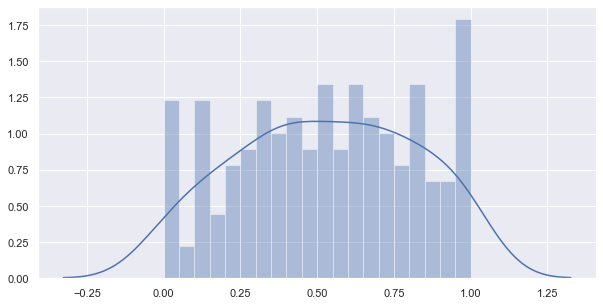

In [870]:
male_school_share=df_merged.Male_channel_aggregated_school/df_merged.Male_total
sns.distplot(male_school_share.dropna(),bins=20)

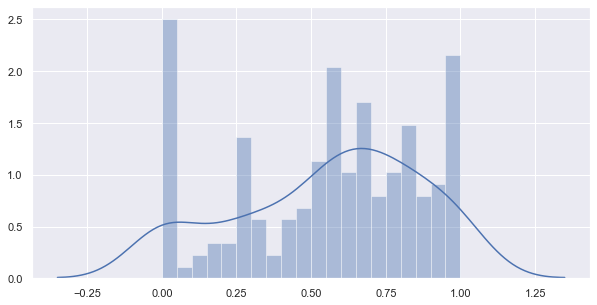

In [871]:
female_school_share=df_merged.Female_channel_aggregated_school/df_merged.Female_total
sns.distplot(female_school_share.dropna(),bins=20)